# Table of Content<a class="anchor" id="table-of-content"></a>
* [1. Problem Introduction and Motivation](#problem-introduction)
* [2. Libraries and Custome Functions](#libraries)
* [3. Data Preparation and Modeling](#modeling)
* [4. Training and Testing Model](#train-test-model)
* [5. Machine Learning](#machine-learning)
* [6. References and Sources](#references-sources)
* [7. Deployment](#deployment)

# 1.Problem Introduction and Motivation<a class="anchor" id="problem-introduction"></a>
* [Go to Top](#table-of-content)
<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTt40imgYUmugz4aZxP_Tvg90kY1-JgC-a2kA&usqp=CAU'/>
     
### Problem  Introduction and Motivation
>In the first quarter of 2022, about 20.4 million Americans have a personal loan, so it is very normal for a bank to deal with a lot of people asking for loans every day. Each banks might has its own standard on making loan approval. We hope to use machine learning to build a model that could be used to automate loan approval decisions, and reduce the probability of bad debt.
### Q & A
>**What is the prediction we are trying to make?**<br>
>We want to predict loan approval decisions.<br><br>
>**Why is it important?  Who cares?**<br>
>Due to the large number of people asking for loan every day, it is both time-consuming and costly for the bank to censor the loan by employees. With the model, bank can save a lot time and money. So banks might be intersted in how the model works and how accurate it is on making the right decision.<br><br>
>**What are the possible actions that could be taken as a result of this work?**<br>
>Bank can use the model as a reference when making loan approval decisons.<br><br>

# 2. Libraries and Custome Functions<a class="anchor" id="libraries"></a>
* [Go to Top](#table-of-content)

In [18]:
import pandas as pd
# pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with
# "relational" or "labeled" data both easy and intuituve.

pd.options.display.float_format = '{:.2f}'.format
# ask pandas to display float values to two decimal places.

import numpy as np
# numpy is a Python library used for working with arrays. Is also has functions for working in domain of linear 
# algebra, fourier transform, and matrices.

import math
# math module allows you to perform mathematical tasks on numbers.

import statsmodels.api as sm
# statsmodels is a Python package that allows users to explore data, estimate statistical models, and perform 
# statistical tests. API stands for application programming interface, an API acts as a communication layer, or as 
# an interface that allows different systems to talk to each other without having to understand exactly what each 
# other does.

import pickle
# pickle is a module that is used for serializing and de-reserializing a Python object structure.

import matplotlib.pyplot as plt
# matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB.

import seaborn as sns
# seaborn is a data visualization library for statistical graphic plotting in Python, and it is based on matplotlib.

import plotly.graph_objects as go
# plotly.graph_objects is a module that contains an automatically generated hierarchy of Python classes which 
# represent non-leaf nodes in this figure schema.

from sklearn.linear_model import LogisticRegression
# sklearn.linear_model is a machine learning package. It offers a set of fast tools for machine learning and 
# statistical modeling, such as classification, regression, clustering, and dimenstionality reduction, and we want
# to import LogisticRegression tool from sklearn.linear_model.

from sklearn import metrics
# sklearn.metrics is a module that implements several loss, score, and utility functions to measure classification
# performance.

from sklearn.metrics import accuracy_score
# sklearn.metrics is a module that implements several loss, score, and utility functions to measure classification
# performance, the accuracy_score function calculates the accuracy score for a set of predicted labels against the 
# true labels.

from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, r2_score, mean_squared_error
# sklearn.metrics is a module that implements several loss, score, and utility functions to measure classification
# performance, and we want to use the functions we import to calculate mean absolute percentage error(MAPE), mean 
# absolute error(MAE), R2 score, and mean squared error(MSE).

from sklearn.model_selection import train_test_split
# train_test_split function of the sklearn.model_selection package splits array or matrices into random subsets
# for train and test data.

from sklearn.linear_model import LinearRegression
# LinearRegression function contains different functions for performing machine learning with linear models.

from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
# NearestNeighbors function helps us finding he nearest neighbors between two sets of data, KNeighborsClassifier
# implements the k-nearest neighbors vote.

In [19]:
# Create a function for getting statistical values, it use dictionary to get the value of the of different measurements of 
# the data.
def my_summary_stats(X,feature_list):
    temp = pd.DataFrame(dict(mean = X[feature_list].mean().round(2),
                             median = X[feature_list].median().round(2),
                             std_dev = X[feature_list].std().round(2),
                             min_val = X[feature_list].min().round(2),
                             max_val = X[feature_list].max().round(2),
                             outlier_issue = np.where(X[feature_list].std()/X[feature_list].mean() > 2,
                                                      True,False)
                            ))
    return temp

def target_by_cats(X):
    '''
    This function assumes the input dataframe (X) has a numerically defined target
    variable in the first column and that all remaining features are categorical
    '''
    global_mean = X.iloc[:,0].mean()
    target = X.columns[0]
    for col in X.columns[1:]:
        df_group = X.groupby(by=col)[target].agg(['mean']).round(2)
        df_group['diff'] = (df_group['mean'] - global_mean).round(2)
        display(df_group)

In [20]:
# Create a function for training and testing data
def train_test_metrics(X_train,X_test,y_train,y_test,model):
    names=['R2','Adj-R2','MAE','MAPE','SSE'] 
    
    # Training Metrics
    y_hat = model.predict(X_train)
    
    # Create R2
    r2 = r2_score(y_train,y_hat).round(3)
    
    # Create adj_R2
    adj_r2 = (1-(1-r2_score(y_train,y_hat))*(len(y_train)-1)/(len(y_train)-len(model.coef_)-1)).round(3)

    
    train_metrics = [r2, adj_r2,
                     mean_absolute_error(y_train,y_hat).round(3),
                     mean_absolute_percentage_error(y_train,y_hat).round(3)*100,
                     (mean_squared_error(y_train,y_hat)*len(y_train)).round(3)
                    ]
    train_metrics = pd.DataFrame({'Train':train_metrics},index=names)
    
    # Testing Metrics
    y_hat = model.predict(X_test)
    test_metrics = [r2_score(y_test,y_hat).round(3),
                    (1-(1-r2_score(y_test,y_hat))*(len(y_test)-1)/(len(y_test)-len(model.coef_)-1)).round(3),
                    mean_absolute_error(y_test,y_hat).round(3),
                    mean_absolute_percentage_error(y_test,y_hat).round(3)*100,
                    (mean_squared_error(y_test,y_hat)*len(y_test)).round(3)
                   ]
    test_metrics = pd.DataFrame({'Test':test_metrics},index=names)
    
    all_metrics = train_metrics.merge(test_metrics,left_index=True,right_index=True)
    print(all_metrics)

In [21]:
# Custom function below is used to display performance measures
# Required inputs are the model name and the two test data objects (X,y)
def class_perf_measures(model,X_test,y_test):
    # Create empty lists to store metric values created within loop
    TP = []
    TN = []
    FP = []
    FN = []
    recall = []
    precision = []
    F1 = []
    Accuracy = []
    
    # Create list of probability threshold values to loop over
    threshold = np.arange(0,1.1,0.1).tolist()

    # Start loop
    for i in threshold:

        # Create class assignments given threshold value
        y_test_pred_class = (model.predict_proba(X_test)[:,1] >= i).astype(int)

        # Append lists with metric values
        TP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,1])
        TN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,0])
        FP.append(metrics.confusion_matrix(y_test, y_test_pred_class)[0,1])
        FN.append(metrics.confusion_matrix(y_test, y_test_pred_class)[1,0])
        recall.append(metrics.recall_score(y_test, y_test_pred_class).round(3))
        precision.append(metrics.precision_score(y_test, y_test_pred_class).round(3))
        F1.append(metrics.f1_score(y_test, y_test_pred_class).round(2))
        Accuracy.append(metrics.accuracy_score(y_test, y_test_pred_class).round(2))
    # Create dataframe
    result = pd.DataFrame({"Threshold":threshold,
                           "TP":TP,
                           "TN":TN,
                           "FP":FP,
                           "FN":FN,
                           "Precision":precision,
                           "Recall":recall,
                           "Accuracy": Accuracy,
                           "F1": F1
                          })

    # Let's look at our dataframe
    return result

# 3.Data Preparation and Modeling<a class="anchor" id="modeling"></a>
* [Go to Top](#table-of-content)

In [22]:
df = pd.read_csv('loan_approval.csv')
# df means data frame, the read_csv() function is used to retrieve data from from csv file, and this function is 
# in the pandas package so there is a pd. in front of the function.

pd.set_option('display.max_columns', None)
# Setting the max row number we want to display, the default is 10 and if we set the value as None, it will display
# all the rows.

df.info()
# Look at the information of the data frame.

df.tail()
# Look at the last 5 records of the data frame.

# df.head()
# Look at the first 5 records of the data frame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   approved               690 non-null    int64  
 1   gender                 690 non-null    int64  
 2   age                    690 non-null    float64
 3   debt                   690 non-null    float64
 4   married                690 non-null    int64  
 5   bank_customer          690 non-null    int64  
 6   emp_industrial         690 non-null    int64  
 7   emp_materials          690 non-null    int64  
 8   emp_consumer_services  690 non-null    int64  
 9   emp_healthcare         690 non-null    int64  
 10  emp_financials         690 non-null    int64  
 11  emp_utilities          690 non-null    int64  
 12  emp_education          690 non-null    int64  
 13  ethnicity_white        690 non-null    int64  
 14  ethnicity_black        690 non-null    int64  
 15  ethnic

,approved,gender,age,debt,married,bank_customer,emp_industrial,emp_materials,emp_consumer_services,emp_healthcare,emp_financials,emp_utilities,emp_education,ethnicity_white,ethnicity_black,ethnicity_latino,ethnicity_asian,ethnicity_other,years_employed,prior_default,employed,credit_score,drivers_license,citizen_bybirth,citizen_other,citizen_temporary,Income
685,0,1,21.08,10.09,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1.25,0,0,0,0,1,0,0,0
686,0,0,22.67,0.75,1,1,1,0,0,0,0,0,0,1,0,0,0,0,2.00,0,1,2,1,1,0,0,394
687,0,0,25.25,13.50,0,0,0,0,0,1,0,0,0,0,0,1,0,0,2.00,0,1,1,1,1,0,0,1
688,0,1,17.92,0.20,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0.04,0,0,0,0,1,0,0,750
689,0,1,35.00,3.38,1,1,1,0,0,0,0,0,0,0,1,0,0,0,8.29,0,0,0,1,1,0,0,0


>**Initial evaluations and observations of the data:**<br>
>>**Records:** 690 (since starting from 0 to 689)<br>
>>**Features in current data(total 27 features):** approved, gender, age, debt, married, bank_customer, emp_industrial, emp_materials, emp_consumer_services, emp_healthcare, emp_financials, emp_utilities, emp_education, ethnicity_white, ethnicity_black, ethnicity_latino, ethnicity_asian, ethnicity_other, years_employed, prior_default, employed, credit_score, drivers_license, citizen_bybirth, citizen_other, citizen_temporary, Income<br>
>>**Potential features that we can add in the future:** month, engine type, aircraft type, total flight hours of the captain<br>
>>**Data Type:** Reasonable(the actual data type is same as we expected)<br>
>>**Target Feature:** approved
<br><br>

| Feature               | Thoughts/Expectations(impact on approved)          |ActualData Type| Expected Data Type |
|-----------------------|----------------------------------------------------|---------------|--------------------|
| approved:             | the loan is approved or not(target variable)       | int64         | int                |
| gender:               | client's gender(neutral)                           | int64         | int                |
| age:                  | client's age(+) 	                                 | float64       | float              |
| debt:                 | client's debt amount(--)  	                     | float64       | float              | 
| married: 	            | client's marital status(+)                         | int64         | int                |
| bank_customer:        | was the client a customer of the bank before(+)    | int64         | int                |
| emp_industrial:       | client is an industrial employee or not(nuetral)   | int64         | int                |
| emp_materials:        | client is a material employee or not(neutral)      | int64         | int                |
| emp_consumer_services:| client is a consumer serivice empployee (neutral)  | int64         | int                |
| emp_healthcare:       | client is a healthcare employee or not(neutral)    | int64         | int                |
| emp_financials:       | client is a financial employee or not(neutral)     | int64         | int                |
| emp_utilities:        | client is an utility employee or not(neutral)      | int64         | int                |
| emp_education:   	    | client is an education employee or not(neutral)    | int64         | int                |
| ethnicity_white:      | client's ethnicity is white or not(neutral)        | int64         | int                |
| ethnicity_black:      | client's ethnicity is black or not(neutral)        | int64         | int                |
| ethnicity_latino:     | client's ethnicity is latino or not(neutral)       | int64         | int                |
| ethnicity_asian:      | client's ethnicity is asian or not(neutral)        | int64         | int                | 
| ethnicity_other:      | client's ethnicity is other or not(neutral)        | int64         | int                |
| years_employed:       | client's years of employment(+)                    | float64       | float              |
| prior_default:        | does the client has a prior default or not(--)     | int64         | int                |
| employed:             | client's is now employed or not(++)                | int64         | int                |
| credit_score:         | client's credit score(++)                          | int64         | int                |
| drivers_license:      | does the client has a driver license (+)           | int64         | int                |
| citizen_bybirth:      | client is a citizen by birth or not(+)             | int64         | int                |
| citizen_other:        | client is a citizen by other reasons or not(+)     | int64         | int                |
| citizen_temporary:    | client is a temporary citizen or not(-)            | int64         | int                |
| Income:               | the client's income(++)                            | int64         | int                |

>**Initial assumptions of the meaning of 1 and 0 for the binary variables:**<br>

| Feature               | Assumptions for 1              | Assumptions for 0                  |
|-----------------------|--------------------------------|------------------------------------|
| approved:             | approved                       | not approved                       | 
| gender:               | male                           | female                             |
| married:              | married	                     | not married                        | 
| bank_customer         | was a customer before  	     | wasn't a customer before           |
| emp_industrial: 	    | is an industrial employee      | isn't an industrial employee       | 
| emp_materials:        | is a materials employee        | isn't a material employee          | 
| emp_consumer_services:| is a consumer services employee| isn't a consumer service employee  |
| emp_healthcare:       | is a healthcare employee       | isn't a healthcare employee        |
| emp_financials:       | is a financials employee       | isn't a financials employee        |
| emp_utilities:        | is an utilities employee       | isn't an utilities employee        |
| emp_education:        | is an education employee       | isn't an education employee        |
| ethnicity_white       | ethnicity is white             | ethnicity isn't white              |
| ethnicity_black       | ethnicity is black             | ethnicity isn't black              |
| ethnicity_latino      | ethnicity is latino            | ethnicity isn't black              |
| ethnicity_asian       | ethnicity is asian             | ethnicity isn't asian              |
| ethnicity_other       | ethnicity is other             | ethnicity isn't other              |
| prior_default         | do have a prior default        | do not have a prior default        |
| employed              | is employed now                | isn't employed now                 |
| drivers_license       | has a driver license           | do not have a driver license       |
| citizen_bybirth       | is a citizen by birth          | isn't a citizen by birth           |
| citizen_other         | is a citizen by other reasons  | isn't a citizen by other reasons   |
| citizen_temporary     | is a temporary citizen         | isn't a temporary citizen          |

In [23]:
# Removing duplicates and compare the number of records before and after removing duplicates.
print('Number of records:', len(df))
df.drop_duplicates()
print('Number of records after dropping dupes:', len(df))

# finding the total missing values for each column
df.isnull().sum()

Number of records: 690
Number of records after dropping dupes: 690


approved                 0
gender                   0
age                      0
debt                     0
married                  0
bank_customer            0
emp_industrial           0
emp_materials            0
emp_consumer_services    0
emp_healthcare           0
emp_financials           0
emp_utilities            0
emp_education            0
ethnicity_white          0
ethnicity_black          0
ethnicity_latino         0
ethnicity_asian          0
ethnicity_other          0
years_employed           0
prior_default            0
employed                 0
credit_score             0
drivers_license          0
citizen_bybirth          0
citizen_other            0
citizen_temporary        0
Income                   0
dtype: int64

>**Initail cleanup summary**<br><br>
*No duplicates in our data frame*<br><br>
*No missing values in our data frame*<br>

In [24]:
# Identify all the numeric columns in the data frame and then show some statistics, we transpose the data frame by
# adding .T at the end
df.describe().T

,count,mean,std,min,25%,50%,75%,max
approved,690.00,0.44,0.50,0.00,0.00,0.00,1.00,1.00
gender,690.00,0.70,0.46,0.00,0.00,1.00,1.00,1.00
age,690.00,31.51,11.86,13.75,22.67,28.46,37.71,80.25
debt,690.00,4.76,4.98,0.00,1.00,2.75,7.21,28.00
married,690.00,0.76,0.43,0.00,1.00,1.00,1.00,1.00
bank_customer,690.00,0.76,0.43,0.00,1.00,1.00,1.00,1.00
emp_industrial,690.00,0.36,0.48,0.00,0.00,0.00,1.00,1.00
emp_materials,690.00,0.12,0.32,0.00,0.00,0.00,0.00,1.00
emp_consumer_services,690.00,0.21,0.41,0.00,0.00,0.00,0.00,1.00
emp_healthcare,690.00,0.08,0.27,0.00,0.00,0.00,0.00,1.00


In [25]:
# Create a dataframe that only contains numerical variables and use the funtion 'my_summary_stats' to gain an insight
# of the statistical value of the variables.
numerical_vars = ['approved', 'gender', 'age', 'debt', 'married', 'bank_customer', 'emp_industrial',
'emp_materials', 'emp_consumer_services', 'emp_healthcare', 'emp_financials', 'emp_utilities', 'emp_education', 
'ethnicity_white', 'ethnicity_black', 'ethnicity_latino', 'ethnicity_asian', 'ethnicity_other', 'years_employed',
'prior_default', 'employed', 'credit_score', 'drivers_license', 'citizen_bybirth', 'citizen_other', 'citizen_temporary',
'Income']
my_summary_stats(df,numerical_vars)

,mean,median,std_dev,min_val,max_val,outlier_issue
approved,0.44,0.00,0.50,0.00,1.00,False
gender,0.70,1.00,0.46,0.00,1.00,False
age,31.51,28.46,11.86,13.75,80.25,False
debt,4.76,2.75,4.98,0.00,28.00,False
married,0.76,1.00,0.43,0.00,1.00,False
bank_customer,0.76,1.00,0.43,0.00,1.00,False
emp_industrial,0.36,0.00,0.48,0.00,1.00,False
emp_materials,0.12,0.00,0.32,0.00,1.00,True
emp_consumer_services,0.21,0.00,0.41,0.00,1.00,False
emp_healthcare,0.08,0.00,0.27,0.00,1.00,True


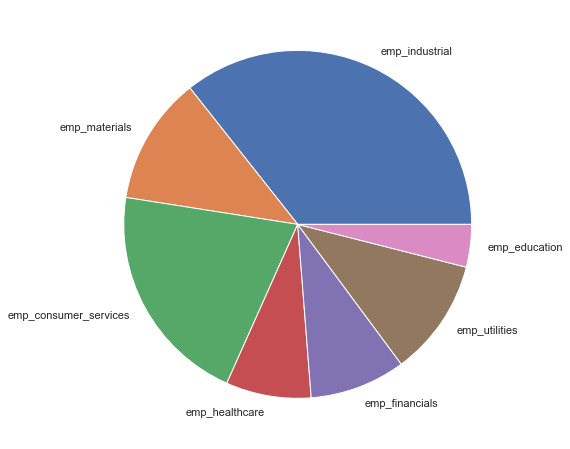

In [26]:
# Creating a pie chart for the client's work field to see the their proportions.
y = np.array([0.36, 0.12, 0.21, 0.08, 0.09, 0.11, 0.04])
work_field = ["emp_industrial", "emp_materials", "emp_consumer_services", "emp_healthcare", "emp_financials", "emp_utilities", "emp_education"]
plt.pie(y, labels = work_field)
plt.show()

>**Further investigation of client's work field features:**<br><br>
>1. The sum of the means of all client's work field features is 0.36 + 0.12 + 0.21 + 0.08 + 0.09 + 0.11 + 0.04 = 1.01.
>2. The above result is very close to 1 so we can conclude that each client matches a work field feature.
>3. The proportion of the emp_industrial is relatively high compared to other carriers.

/var/folders/qn/b83j31g56rg2d51wzvlbt_n00000gn/T/ipykernel_49787/1018989298.py:4: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(y, labels = ethnicity)


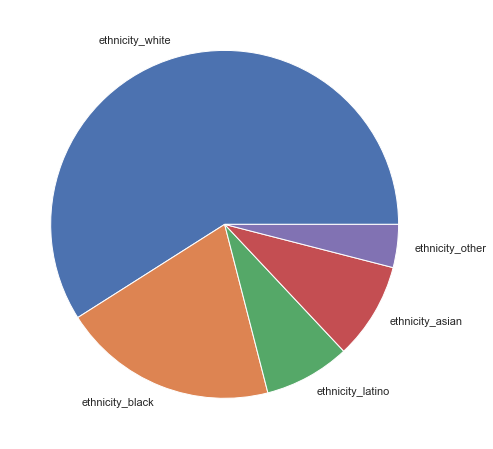

In [27]:
# Creating a pie chart for the client's ethnicity to see the their proportions.
y = np.array([0.59, 0.20, 0.08, 0.09, 0.04])
ethnicity = ["ethnicity_white", "ethnicity_black", "ethnicity_latino", "ethnicity_asian", "ethnicity_other"]
plt.pie(y, labels = ethnicity)
plt.show()

>**Further investigation of client's ethnicity features:**<br><br>
>1. The sum of the means of all client's enthnicity features is 0.59 + 0.20 + 0.08 + 0.09 + 0.04 = 1.
>2. The above result is eqaul to 1 so we can conclude that each client matches an ethnicity.
>3. The proportion of the ethnicity_white is relatively high compared to other ethnicities.

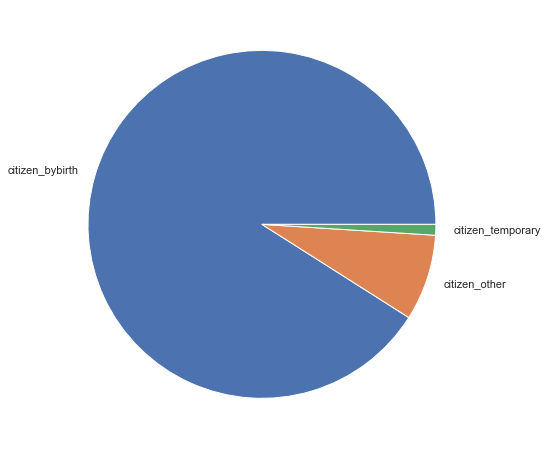

In [28]:
# Creating a pie chart for the client's citizen status to see the their proportions.
y = np.array([0.91, 0.08, 0.01])
citizen_status = ["citizen_bybirth", "citizen_other", "citizen_temporary"]
plt.pie(y, labels = citizen_status)
plt.show()

>**Further investigation of citizen status features:**<br><br>
>1. The sum of the means of all client's citizen status features is 0.91 + 0.08 + 0.01.
>2. The above result is eqaul to 1 so we can conclude that each client matches a citizen status.
>3. The proportion of the citizen_bybirth is relatively high compared to other citizen satus.

<AxesSubplot:xlabel='approved'>

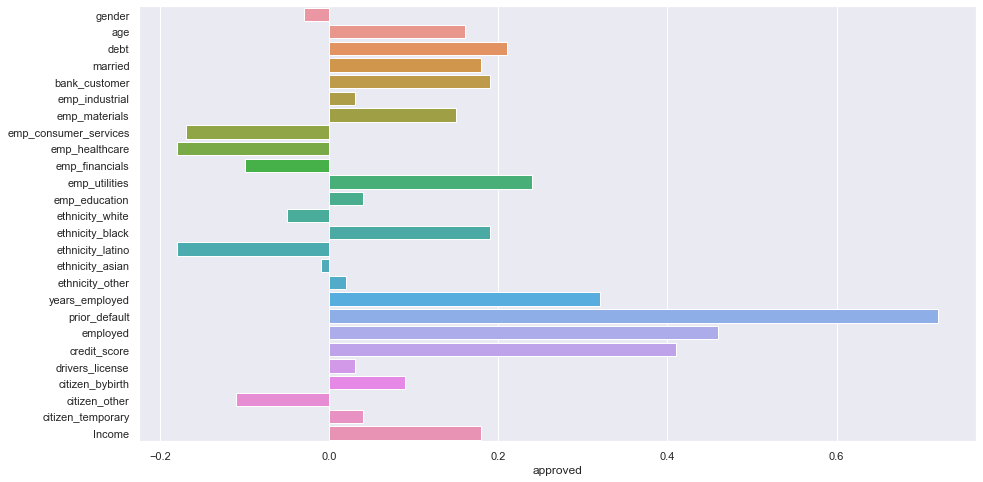

In [29]:
# Find the correlations between our target variable and the remaining numerical features.
# Instead of displaying in a heatmap or table, let's drop those values into a horizontal barchart
# for easier viewing.
a = df[numerical_vars].corr()[['approved']].round(2)
sns.set(rc= {'figure.figsize':(15,8)})
sns.barplot(x=a.approved[1:],y=a.index[1:],data=a, orient='h')

> **Initial evaluations and observations of numerical features by using barchart:**<br><br>
>The correlations between aprroved and other features:
>1. gender (-): Not as we expected. Based on our previous assumption, male is 1 and female is 0. So maybe the bank thinks female is more reliable than male on paying the loan back.
>2. age (+): Same as we expected. People's income usually increases as they get older. With larger income, people are more likely to pay the loan back.
>3. debt (+): Opposite as we expected. After doing some research, we found out that about 80 percent of Americans are in debt. So it might be allowable for people to loan if their debt isn't too much.  
>4. married (+): Same as we expected. People usually get married when their financial status is stable, and this make them more possible to pay the loan back.
>5. bank_customer (+): Same as we expected. If the client was a customer of the bank before, the bank has more information about the client and its financial status.
>6. emp_industrial (+): Not as we expected. Maybe based on the bank's previous records, industrial employees are more likly to pay the loan back. 
>7. emp_materials (+): Not as we expected. Maybe based on the bank's previous records, materials employees are more likly to pay the loan back. 
>8. emp_consumer_services (-): Not as we expected. Maybe based on the bank's previous records, consumer services employees are less likly to pay the loan back. 
>9. emp_healthcare (-): Not as we expected. Maybe based on the bank's previous records, healthcare employees are less likly to pay the loan back. 
>10. emp_financials (-): Not as we expected. Maybe based on the bank's previous records, financials employees are less likly to pay the loan back. 
>11. emp_utilities (+): Not as we expected. Maybe based on the bank's previous records, utilities employees are more likly to pay the loan back. 
>12. emp_education (+): Not as we expected. Maybe based on the bank's previous records, education employees are more likly to pay the loan back. 
>13. ethnicity_white (-): Not as we expected. Maybe based on the bank's previous records, white people are less likly to pay the loan back. 
>14. ethnicity_black (+): Not as we expected. Maybe based on the bank's previous records, black people are more likly to pay the loan back. 
>15. ethnicity_latino (-): Not as we expected. Maybe based on the bank's previous records, latino people are less likly to pay the loan back. 
>16. ethnicity_asian (-): Not as we expected. Maybe based on the bank's previous records, asian people are less likly to pay the loan back. 
>17. ethnicity_other (+): Not as we expected. Maybe based on the bank's previous records, other ethnicities are more likly to pay the loan back. 
>18. years_employed (+): Same as we expected. People's income usually increases as their total work years increases, and greater income means the person is more possible to pay the loan back. 
>19. prior_default (+): Opposite as we expected. It is weird that the correlation is positive since it doesn't make sense for the bank to give loan to people who have prior default. Maybe in this feature, 1 means do not having a prior default and 0 means having a prior default.
>20. employed (+): Same as we expected. When a person is employed, it means he or she has a stable income and will be more possible to pay the loan back.
>21. credit_score (+): Same as we expected. When a person has a high credit score, it means he or she has demonstrated responsible credit in the past. So the bank can be more confident of receiving loan payment from the person.
>22. drivers_license (+): Same as we expected. People who has a driver license usually have their own car, and people should have a stable income or some deposit to afford a car. So the bank can be more confident of receiving loan payment from the person.
>23. citizen_bybirth (+): Same as we expected. Bank might be more easier to know the person's information if he or she is a citizen.
>24. citizen_other (-): Not as we expected. Maybe based on the bank's previous records, people who become citizen by other ways are less likely to pay the loan back.
>25. citizen_temporary (+): Not as we expected. Maybe people with temporary citizen usually hope to become a permanent citizen in the future so they try their best to pay the loan back so they can have a higher credit score and reputation.
>26. Income (+): Same as we expected. People with higher income means he or she is has more money on hand and more likely to pay the loan back.

# 4.Training and Testing Model<a class="anchor" id="train-test-model"></a>
* [Go to Top](#table-of-content)

> **Data Partitioning:** <a class="anchor" id="data-split"></a>
<br><br>
>**To Do**:
>1. Put all potential predictor variables into new object called 'X'
>2. Put target variable in new object called 'y'
>3. Partition data into training set and testing set<br>

In [30]:
# predictors = ['gender', 'age', 'debt', 'married', 'bank_customer', 'emp_industrial',
# 'emp_materials', 'emp_consumer_services', 'emp_healthcare', 'emp_financials', 'emp_utilities', 'emp_education', 
# 'ethnicity_white', 'ethnicity_black', 'ethnicity_latino', 'ethnicity_asian', 'ethnicity_other', 'years_employed',
# 'prior_default', 'employed', 'credit_score', 'drivers_license', 'citizen_bybirth', 'citizen_other', 'citizen_temporary',
# 'Income']
target = ['approved']

# X = df[predictors]
X = df.drop(target,axis=1) 
# Putting all the features except our target feature into X

y = df[target]

# Split data
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=4)

> **Data Normalization:** <a class="anchor" id="normalization"></a>
<br><br>
>**Note:**<br>
>We do this AFTER splitting the data because we only want to use summary stats<br>
>from the TRAINING data to normalize BOTH TRAIN and TEST data<br>
<br><br>
>OPTIONAL - though it is a good idea to get in the habit of doing this when working with the kNN classifier

In [31]:
# Normalize predictor variables using Z-Scores.
# Use means and standard deviations of features as calculated in the TRAINING DATA
# New values are centered at 0.  Values reflect the number of standard deviations
# each record is above or below the mean.

features_means = X_train.mean()
features_std = X_train.std()

X_train = (X_train - features_means)/features_std
X_test = (X_test - features_means)/features_std

# 5.Machine Learning<a class="anchor" id="machine-learning"></a>
- [X] [kNN Model](#knn-model)
- [X] [Logistic Model](#logistic-model)
- [X] [Winning Model](#decision)
* [Go to Top](#table-of-content)

> **kNN Model:** <a class="anchor" id="first-model"></a>
<br>
>Instructions:<br>
>1. kNN(k-nearest neighbors) works by finding distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label.
>2. Fit numerous kNN models using different values for k. <br>
>3. We use odd values for k to avoid two feaures getting the same number.
>2. Choose the "best" value for "k" based on Accuracy.

In [32]:
# Train a classifier for different values of k
results = []
for k in [1,3,5,7,9,11,13,15,17,19,21]: # We choose odd value for k to avoid two features has the same data point in certain k.
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train.values.ravel())
    
    # Get predicted class
    y_pred_class = knn.predict(X_test)
    
    # Put TN, TP, FN, FP, Precision, Recall, F1, Accuracy in results object
    results.append({'k':k,
                    'TP':metrics.confusion_matrix(y_test, y_pred_class)[1,1],
                    'TN':metrics.confusion_matrix(y_test, y_pred_class)[0,0],
                    'FP':metrics.confusion_matrix(y_test, y_pred_class)[0,1],
                    'FN':metrics.confusion_matrix(y_test, y_pred_class)[1,0],
                    'Precison':metrics.precision_score(y_test, y_pred_class).round(3),
                    'Recall':metrics.recall_score(y_test, y_pred_class).round(3),
                    'Accuracy':metrics.accuracy_score(y_test,y_pred_class),
                    'F1':metrics.f1_score(y_test, y_pred_class).round(2),
                   }
                  )
# Put results from above into a Pandas Dataframe
results_df = pd.DataFrame(results)
results_df

,k,TP,TN,FP,FN,Precison,Recall,Accuracy,F1
0,1,56,94,27,30,0.68,0.65,0.72,0.66
1,3,60,100,21,26,0.74,0.70,0.77,0.72
2,5,61,103,18,25,0.77,0.71,0.79,0.74
3,7,60,102,19,26,0.76,0.70,0.78,0.73
4,9,58,104,17,28,0.77,0.67,0.78,0.72
5,11,56,105,16,30,0.78,0.65,0.78,0.71
6,13,58,103,18,28,0.76,0.67,0.78,0.72
7,15,58,104,17,28,0.77,0.67,0.78,0.72
8,17,58,106,15,28,0.80,0.67,0.79,0.73
9,19,59,107,14,27,0.81,0.69,0.80,0.74


>**Decision:**<br>
Based on the results above, I will set my number of neighbors (k) to 19 as this is the lowest value that achieves the highest accuracy value.<br>

>**Re-run kNN using the value selected above:**<br>
For this final run of kNN, we will produce a table of performance measures across a range of probability threshold values.

In [33]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
# Remember!  Small values for "k" in kNN tend to lead to overfitting.
# Large value for "k" in kNN tend to produce underfit models
y_train_pred_class = knn.predict(X_train)
y_test_pred_class = knn.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.83
Testing data Accuracy: 0.8


In [34]:
# Performance measurements of kNN Model
class_perf_measures(knn,X_test,y_test)

,Threshold,TP,TN,FP,FN,Precision,Recall,Accuracy,F1
0,0.00,86,0,121,0,0.41,1.00,0.42,0.59
1,0.10,86,30,91,0,0.49,1.00,0.56,0.65
2,0.20,83,53,68,3,0.55,0.96,0.66,0.70
3,0.30,74,85,36,12,0.67,0.86,0.77,0.76
4,0.40,64,98,23,22,0.74,0.74,0.78,0.74
5,0.50,59,107,14,27,0.81,0.69,0.80,0.74
6,0.60,47,113,8,39,0.85,0.55,0.77,0.67
7,0.70,36,117,4,50,0.90,0.42,0.74,0.57
8,0.80,22,119,2,64,0.92,0.26,0.68,0.40
9,0.90,15,121,0,71,1.00,0.17,0.66,0.30


>**Overfitting evaluation:**<a class="anchor" id="logistic-model"></a>
<br>
>The Training data Accuracy and Testing data Accuracy are close in kNN Model so we don't need to worry about overfitting.

>**Logistic Model:**<a class="anchor" id="logistic-model"></a>
<br>
>Let's produce the same table above but this time using a Logistic Model.

In [35]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train.values.ravel())

# Let's do a quick check to see if we have to worry about problems of overfitting.
y_train_pred_class = lr_model.predict(X_train)
y_test_pred_class = lr_model.predict(X_test)

print('Training data Accuracy:', metrics.accuracy_score(y_train,y_train_pred_class).round(2))
print('Testing data Accuracy:', metrics.accuracy_score(y_test,y_test_pred_class).round(2))

Training data Accuracy: 0.89
Testing data Accuracy: 0.85


>**Overfitting evaluation:**<a class="anchor" id="logistic-model"></a>
<br>
>The Training data Accuracy and Testing data Accuracy are close in Logistic Model so we don't need to worry about overfitting.

>**Choosing the winning model between kNN an Logistic Model:**<a class="anchor" id="logistic-model"></a>
<br>
>1. Testing data Accuracy of the Logistic Model is better than kNN, but not very significant.<br>
>2. Let's try to use AUC to help us decide the winning model.

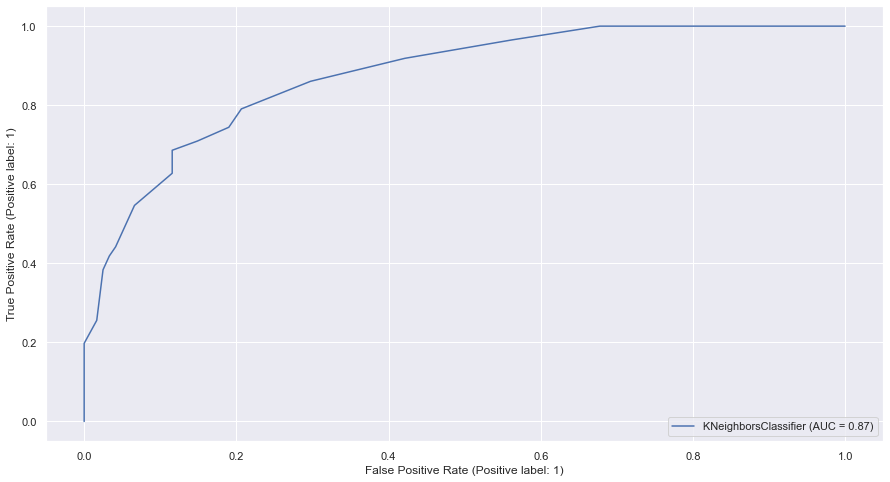

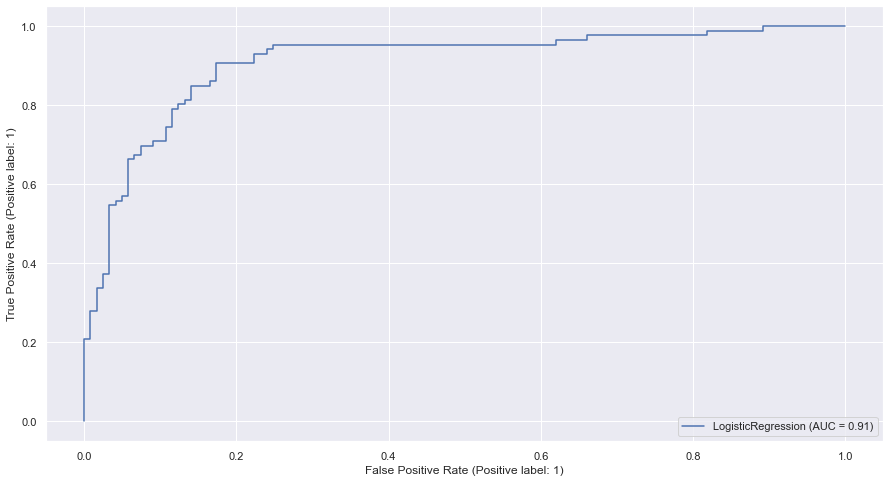

In [36]:
# ROC curve for kNN
metrics.plot_roc_curve(knn,X_test,y_test)
plt.show()

# ROC curve for Logistic Model
metrics.plot_roc_curve(lr_model,X_test,y_test)
plt.show()

>**Decision Point:**<a class="anchor" id="decision"></a>
<br>
AUC is higher for our Logistic Model so I will use that model to further evaluate probability thresholds and corresponding performance measures

In [37]:
# Performance measurements of Logistic Model(Winning Model)
class_perf_measures(lr_model,X_test,y_test)

/Users/daniel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Threshold,TP,TN,FP,FN,Precision,Recall,Accuracy,F1
0,0.00,86,0,121,0,0.41,1.00,0.42,0.59
1,0.10,82,78,43,4,0.66,0.95,0.77,0.78
2,0.20,82,91,30,4,0.73,0.95,0.84,0.83
3,0.30,78,94,27,8,0.74,0.91,0.83,0.82
4,0.40,74,100,21,12,0.78,0.86,0.84,0.82
5,0.50,70,105,16,16,0.81,0.81,0.85,0.81
6,0.60,64,108,13,22,0.83,0.74,0.83,0.79
7,0.70,61,109,12,25,0.84,0.71,0.82,0.77
8,0.80,54,114,7,32,0.89,0.63,0.81,0.73
9,0.90,40,117,4,46,0.91,0.47,0.76,0.62


>**Interpretations of the Confusion Matrix(Loan Approval):**
<br>
>1. Threshold: Indicates the smallest value the predicted probability must have for that record to be assigned to the positive class(1).<br>
>2. TP(True Positive): Predict the loan will be approved and it actually be approved.<br>
>3. TN(True Negative): Predict the loan will not be approved and it actually do not be approved.<br>
>4. FP(False Positive): Predict the loan will be approved but it actaully do not be approved.<br>
>5. FN(False Negative): Predict the loan will not be approved but it actually be approved.<br>
>6. Precison: TP/(TP+FP)
>7. Recall: TP/(TP+FN)
>8. Accuracy: (TP+TN)/n
>9. F1: 2(Recall)(Precision)/(Recall+Precision)
>10. ErrorRate: (FP+FN)/n
>11. n = TP + TN + FP + FN = 207

1. **Prob Threshold = 0.2**:
    - Prob Thresold = 0.2 means that the predicted probabiltiy must be greater or equal to 0.2 for that record to be assigned to positive class(1). 1 in this confusion matrix means the loan is approved.
    - Number of False Positives(FP): 30
    - 30 means that there are 30 times when model predict the loan will be approved but the loan actaully do not be approved. 
    - In the real world, FP might be very costly in this case. Based on the model prediction, the bank will approve the loan and lend the money to the client. However, in reality the client is not trustworthy enough to pay back the loan. Resulting in bad debts in the bank. And if the amount of bad debts is too large, it might make the bank and unable to operate normally or even lead to bank bankruptcy.
    - Number of False Negatives(FN): 4
    - 4 means that there are 4 times when model predict the loan will not be approved but the loan actually be approved.
    - In the real world, FN might not be costly in this case. Bank usually earn money from the interest of the loan. But compared to the amount of loan, the interest is relatively low, so it is not wise for the bank to loan someone who is not trustworthy. Even if the bank carry out a strict check for loan approval, it can still find a lot of clients who meets the standard.
<br><br>
2. **Prob Threshold = 0.6**:
    - Prob Thresold = 0.6 means that the predicted probabiltiy must be greater or equal to 0.6 for that record to be assigned to positive class(1). 1 in this confusion matrix means task completed.
    - Number of False Positives(FP): 13
    - 13 means that there are 13 times when model predict the loan will be approved but the loan actaully do not be approved. 
    - In the real world, FP might be very costly in this case. Based on the model prediction, the bank will approve the loan and lend the money to the client. However, in reality the client is not trustworthy enough to pay back the loan. Resulting in bad debts in the bank. And if the amount of bad debts is too large, it might make the bank and unable to operate normally or even lead to bank bankruptcy.
    - Number of False Negatives(FN): 22
    - 22 means that there are 22 times when model predict the loan will not be approved but the loan actually be approved.
    - In the real world, FN might not be costly in this case. Bank usually earn money from the interest of the loan. But compared to the amount of loan, the interest is relatively low, so it is not wise for the bank to loan someone who is not trustworthy. Even if the bank carry out a strict check for loan approval, it can still find a lot of clients who meets the standard.
<br><br>
3. **Prob Threshold = 0.8**:
    - Prob Thresold = 0.8 means that the predicted probabiltiy must be greater or equal to 0.8 for that record to be assigned to positive class(1). 1 in this confusion matrix means task completed.
    - Number of False Positives(FP): 7
    - 7 means that there are 7 times when model predict the loan will be aprroved but the loan actaully do not be approved. 
    - In the real world, FP might be very costly in this case. Based on the model prediction, the bank will approve the loan and lend the money to the client. However, in reality the client is not trustworthy enough to pay back the loan. Resulting in bad debts in the bank. And if the amount of bad debts is too large, it might make the bank and unable to operate normally or even lead to bank bankruptcy.
    - Number of False Negatives(FN): 32
    - 32 means that there are 32 times when model predict the loan will not be approved but the loan actually be approved.
    - In the real world, FN might not be costly in this case. Bank usually earn money from the interest of the loan. But compared to the amount of loan, the interest is relatively low, so it is not wise for the bank to loan someone who is not trustworthy. Even if the bank carry out a strict check for loan approval, it can still find a lot of clients who meets the standard.
<br><br>
4. **Final Decision for Prob Threshold:**
   - Our final decision for Prob Threshold is 0.8.
   - In this case, False Positives(FP) are more costly than False Negatives(FN). So we are focusing on making False Positives number as small as possible, and the 0.8 threshold has the lowest number of False Positives among the three thresholds above.

# 6.References and Sources<a class="anchor" id="references-sources"></a>
* [Go to Top](#table-of-content)

>1. **Picture in Problem Introduction and Movitation:** https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTt40imgYUmugz4aZxP_Tvg90kY1-JgC-a2kA&usqp=CAU<br>
>2. **Default: What It Means, What Happens When You Default, Examples:** https://www.investopedia.com/terms/d/default2.asp
>3. **American Debt Statisitics:** https://shiftprocessing.com/american-debt/
>4. **Machine Learning Basics with the K-Nearest Neighbors Algorithm** https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761

# 7.Deployment<a class="anchor" id="deployment"></a>
* [Go to Top](#table-of-content)

>**Deployment using dash:**<a class="anchor" id="decision"></a>
<br>
According to the above case, False Positives(FP) are more costly than False Negatives(FN). So we want to create a app to help people find out the number of False Postives for different thresholds.

In [1]:
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output

app = dash.Dash(__name__)

app.layout = html.Div(
    [
        html.H1('False Positive Numbers for different thresholds：'),
        html.Br(),
        dcc.Dropdown(
            id='threshold',
            options=[
                {'label': '0.00', 'value': '0.00'},
                {'label': '0.10', 'value': '0.10'},
                {'label': '0.20', 'value': '0.20'},
                {'label': '0.30', 'value': '0.30'},
                {'label': '0.40', 'value': '0.40'},
                {'label': '0.50', 'value': '0.50'},
                {'label': '0.60', 'value': '0.60'},
                {'label': '0.70', 'value': '0.70'},
                {'label': '0.80', 'value': '0.80'},
                {'label': '0.90', 'value': '0.90'},
                {'label': '1.00', 'value': '1.00'},
            ],
            value='0.00'
        ),
        html.P(id='parent')
    ]
)

threshold_dict = {
    '0.00': '121',
    '0.10': '43',
    '0.20': '30',
    '0.30': '27',
    '0.40': '21',
    '0.50': '16',
    '0.60': '13',
    '0.70': '12',
    '0.80': '7',
    '0.90': '4',
    '1.00': '0',
}

@app.callback(Output('parent', 'children'),
              Input('threshold', 'value'))
def thresholdFP(threshold):

    return threshold_dict[threshold]

if __name__ == '__main__':
    app.run_server()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


/var/folders/qn/b83j31g56rg2d51wzvlbt_n00000gn/T/ipykernel_50725/3278545334.py:2: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
/var/folders/qn/b83j31g56rg2d51wzvlbt_n00000gn/T/ipykernel_50725/3278545334.py:3: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [18/Oct/2022 20:06:38] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [18/Oct/2022 20:06:38] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 304 -
127.0.0.1 - - [18/Oct/2022 20:06:38] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [18/Oct/2022 20:06:38] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [18/Oct/2022 20:06:38] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTT